In [1]:
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import numpy as np

# Load Data

(2, 400)
(1, 400)


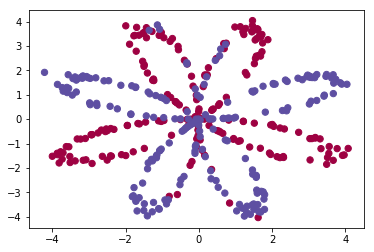

In [2]:
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
# Transform Data
X = X.T
Y = Y[0]

# Decision Tree

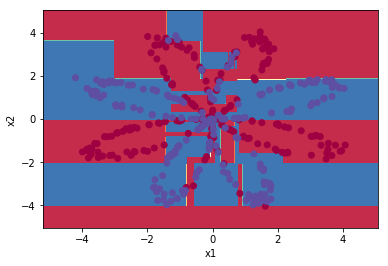

Number of mislabeled points out of a total 400 points : 0


In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

y_pred = clf.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))

# Naïve Bayes

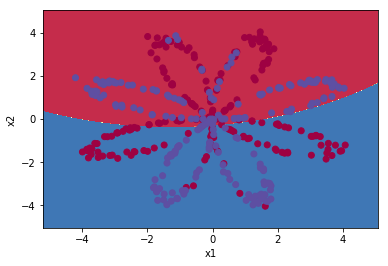

Number of mislabeled points out of a total 400 points : 211


In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model = gnb.fit(X, Y)
y_pred = model.predict(X)

plot_decision_boundary(lambda x: model.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (Y != y_pred).sum()))

# Logistic Regression

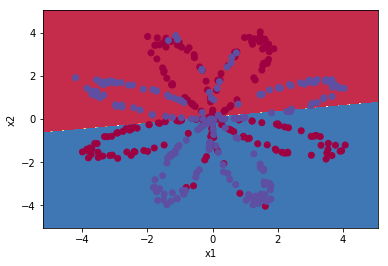

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


In [6]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV();
clf.fit(X, Y);

plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

LR_predictions = clf.predict(X)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# K Nerest Neighbors

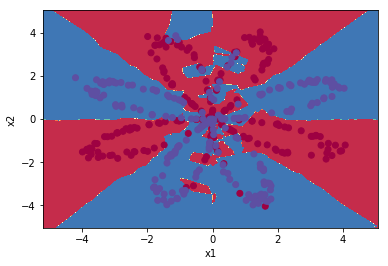

Number of mislabeled points out of a total 400 points : 34


In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y) 

plot_decision_boundary(lambda x: neigh.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

y_pred = neigh.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))

# SVM

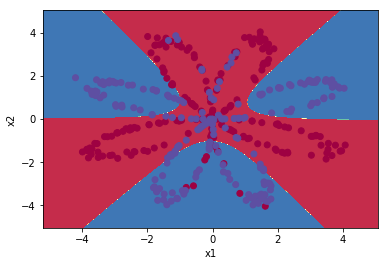

Number of mislabeled points out of a total 400 points : 82


In [8]:
from sklearn.svm import SVC

clf = SVC(kernel='poly')
clf.fit(X, Y) 

plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

y_pred = clf.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))

# Theory: Ensemble skill
## category
- By manipulating the training set(ex. begging, not important)
- By manipulating the input features(random forest ex. XgBoost)
- By manipulating the class labels(multiple class: "one against rest", not "one against one")
- By manipulating the learning algorithm(do not usually use, because result of algorithms are not independent)

## Random Forest
1. Forest-RI (Random Input selection)
    - randomly select F input features to split at each node of the decision tree
    (the split node is determined by the F features )
    - F=log2d +1 , d= the number of features
2. After the trees are constructed , the predictions are combined using a majority voting scheme

<img src="images\randomForest.png">


# XGBOOST

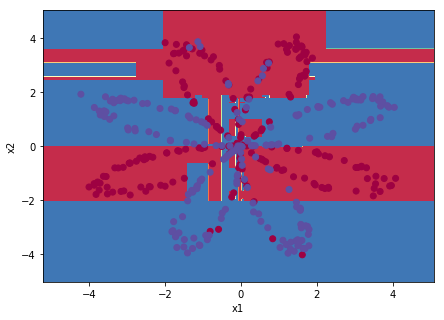

Number of mislabeled points out of a total 400 points : 35


In [10]:
# plot decision tree
from matplotlib import rcParams
from xgboost import plot_tree
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X, Y)

rcParams['figure.figsize'] = 7, 5
plot_decision_boundary(lambda x: model.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

y_pred = model.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))


In [12]:
# plot single tree
rcParams['figure.figsize'] = 80,50
# plot_tree(model)
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()

ImportError: You must install graphviz to plot tree

# XGBOOST_CorssValidation

In [13]:
# Finally, we split some of the data off for validation
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=4242)

In [14]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.04
## learning rate: Lower values generalize well.
params['max_depth'] = 4
## control over-fitting, higher depth specific to a particular sample.

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.674181	valid-logloss:0.676605
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.538834	valid-logloss:0.566348
[20]	train-logloss:0.461032	valid-logloss:0.506836
[30]	train-logloss:0.412048	valid-logloss:0.472745
[40]	train-logloss:0.373532	valid-logloss:0.446285
[50]	train-logloss:0.344948	valid-logloss:0.429488
[60]	train-logloss:0.322751	valid-logloss:0.418707
[70]	train-logloss:0.303378	valid-logloss:0.411712
[80]	train-logloss:0.290708	valid-logloss:0.406696
[90]	train-logloss:0.280978	valid-logloss:0.404596
[100]	train-logloss:0.268066	valid-logloss:0.400425
[110]	train-logloss:0.256099	valid-logloss:0.398235
[120]	train-logloss:0.246274	valid-logloss:0.397474
[130]	train-logloss:0.238616	valid-logloss:0.397226
[140]	train-logloss:0.227346	valid-logloss:0.390432
[150]	train-logloss:0.219234	valid-logloss:0.388177
[160]	train-logloss:0.212231

In [15]:
y_pred = bst.predict(xgb.DMatrix(X)) > 0.5
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))

Number of mislabeled points out of a total 400 points : 15


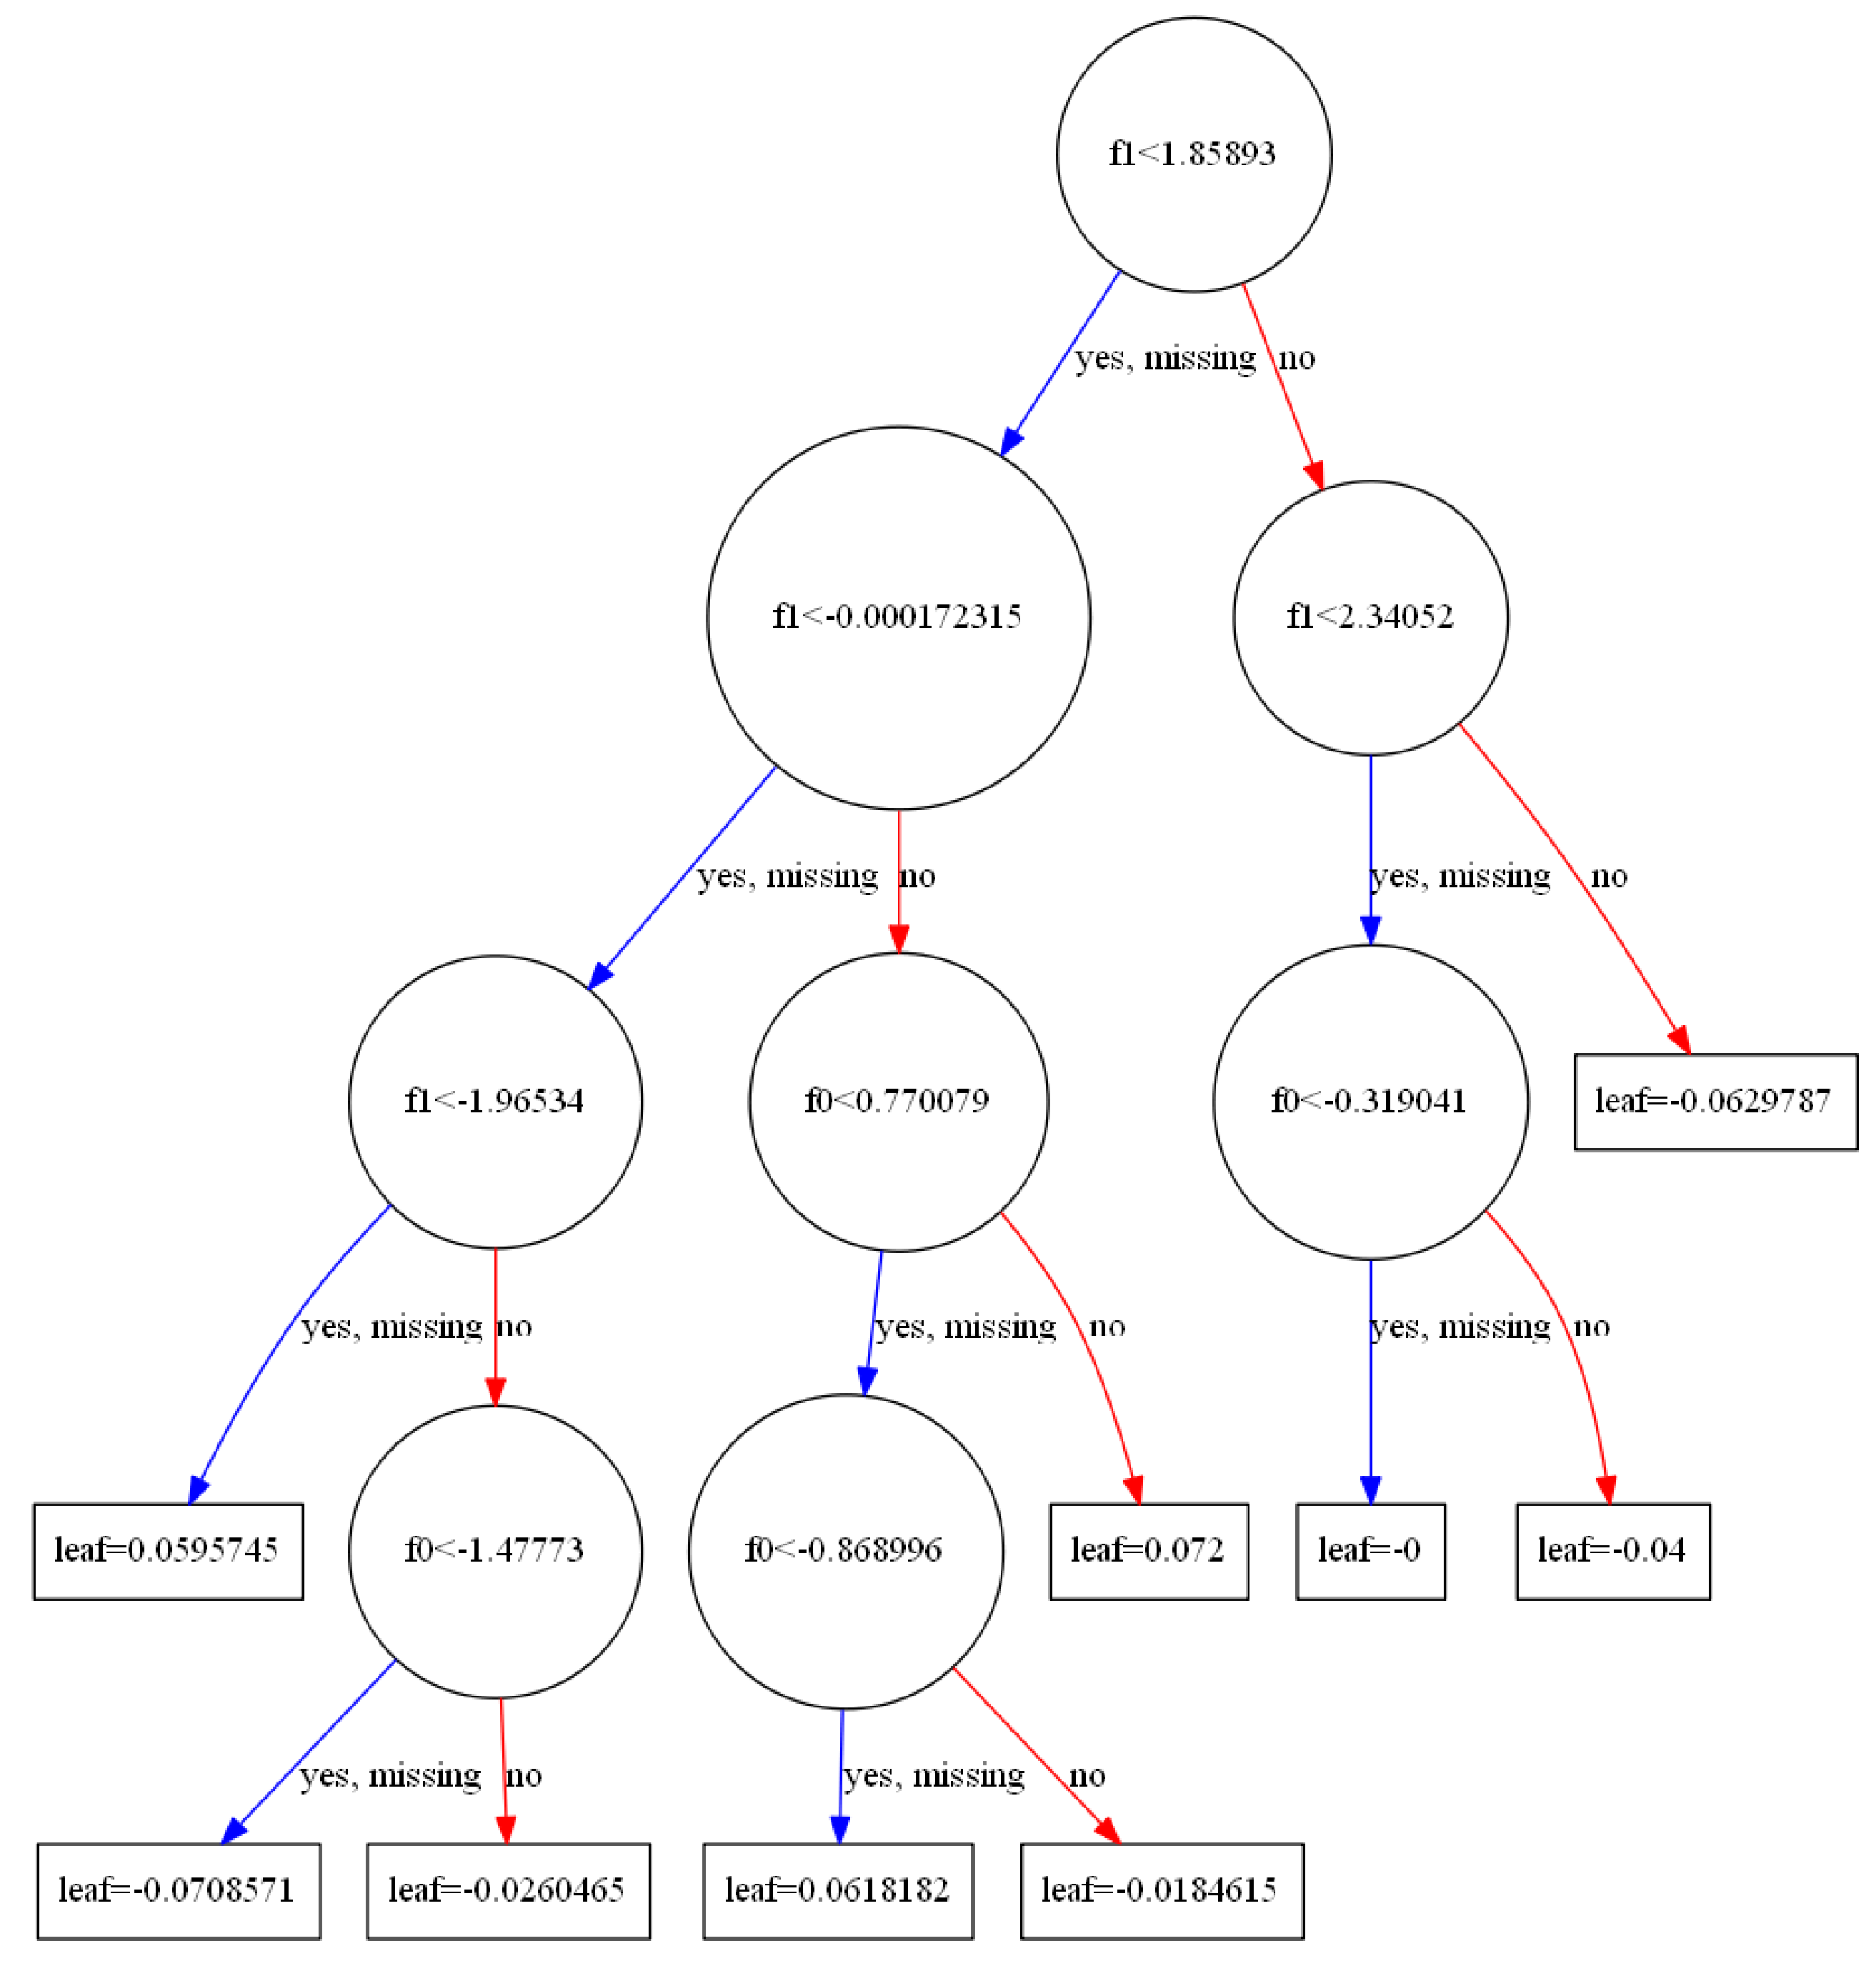

In [31]:
plot_tree(bst)
plt.show()

# Evaluation
<table>
<tbody>
<tr><td colspan="2"></td><td colspan="2">Prediction Class</td></tr>
<tr><td colspan="2"></td><td>Positive</td><td>Negative</td></tr>
<tr><td rowspan="2">Actual Class</td><td>True</td><td>TP</td><td>FN</td></tr>
<tr><td>False</td><td>FP</td><td>TN</td></tr>
</tbody>
</table>

- Generally Use
    - True Positive Rate = TP/(TP+FN) => 真實為Positive的資料中，被正確判斷的機率
    - True Negative Rate = TN/(FP+TN)
    - False Positive Rate = FP/(FP+TN) => 真實為Positive的資料中，被錯誤判斷的機率
    - False Negative Rate = FN/(TP+FN)

- Information Retrieval
    - Precision (p)= TP/(TP+FP)
    - Recall (r) = TP/(TP+FN)
    - F-measure = 2rp/(r+p)
    
- ROC (Receiver Operating Characteristics)
    - displaying tradeoff between true positive rate & false positive rate of a classifier
<img src="images\ROC.jpg" width="600">
<img src="images\ROC_Curve.png" width="350">

- AUC (Area Under receiver operating characteristics Curve)
<img src="images\AUC.jpg" width="350">